In [1]:
import vcf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage ,fcluster
from collections import Counter
#from sklearn.datasets.samples_generator import make_blobs
from sklearn import preprocessing
from sklearn.metrics.cluster import adjusted_rand_score
import itertools
import random
from scipy.spatial import distance as ssd
from tqdm import tqdm
import scipy
import scipy.sparse 
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import kneighbors_graph 
from scipy.sparse.linalg import expm
from scipy.linalg import solve_banded
from scipy.spatial.distance import pdist
import scipy.spatial.distance
import math
from sklearn.metrics.pairwise import euclidean_distances
import sklearn
import os.path
import re
from bisect import bisect_left
plt.ion()
plt.show()

In [2]:
df = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df = df.dropna()

In [3]:
target = list(df[df['lineage']=='B.1.1.7']['INAB sample ID'])

In [4]:
file_dir = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files'
def getFlist(path):
    f = []
    for root, dirs, files in os.walk(file_dir):
        f.append(files)
    return f
file_name = getFlist(file_dir)[0]

<BarContainer object of 50 artists>

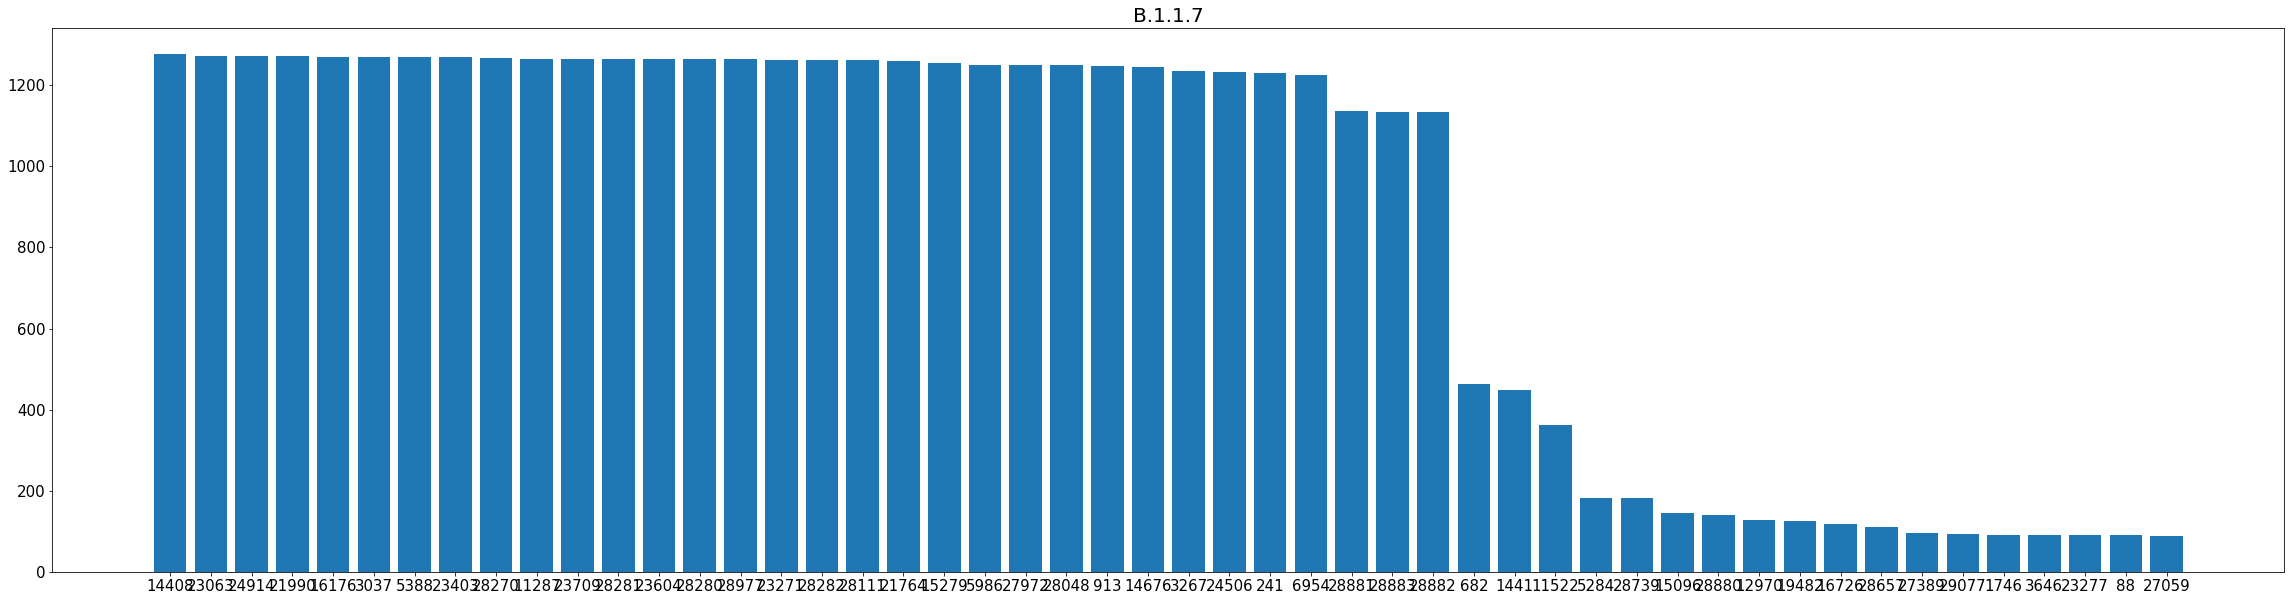

In [5]:
pos_record = {}

for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for record in test:
                if record.POS not in pos_record:
                    pos_record[record.POS] = 1
                else:
                    pos_record[record.POS] += 1

res = sorted(pos_record.items(),key = lambda item:item[1],reverse=True)
sor_res = {str(k):v for k,v in res}
plt.figure(figsize=(40, 10))
x = list(sor_res.keys())
y = list(sor_res.values())
plt.tick_params(labelsize=15)
plt.title('B.1.1.7',fontsize=20)
plt.bar(x[:50],y[:50])

In [6]:
nucleotide_record = {'A':{'A':0,'C':0,'G':0,'T':0},'C':{'A':0,'C':0,'G':0,'T':0},
          'G':{'A':0,'C':0,'G':0,'T':0},'T':{'A':0,'C':0,'G':0,'T':0}}
nucleotide = ['A','C','G','T']
for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for record in test:
                if record.ALT[0] in nucleotide:
                    if record.REF[0] in nucleotide:
                        nucleotide_record[record.REF[0]][str(record.ALT[0])]+=1

nucleotide_record

{'A': {'A': 1414, 'C': 227, 'G': 3225, 'T': 2694},
 'C': {'A': 3979, 'C': 19, 'G': 6, 'T': 18742},
 'G': {'A': 2696, 'C': 3771, 'G': 1301, 'T': 3094},
 'T': {'A': 1380, 'C': 3841, 'G': 1663, 'T': 2559}}

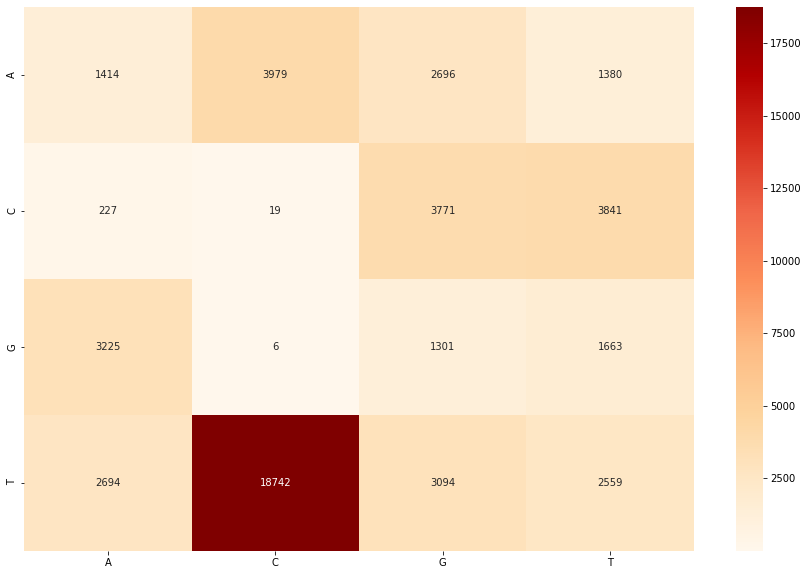

In [7]:
df = pd.DataFrame(nucleotide_record, index=nucleotide, columns=nucleotide)
plt.figure(figsize=(15,10))
sns.heatmap(df, annot=True, fmt='d',cmap="OrRd",annot_kws={'size':10})
plt.show()

# sample information

In [8]:
df = pd.read_csv('bio_sample.csv',encoding='unicode_escape')
df_edit = df.drop(index=df[(df.attribute_name=='investigation type')].index)
df_edit = df_edit.drop(index=df[(df.attribute_name=='sewage type')].index)
attribute = list(df_edit.iloc[:26,:].attribute_name.dropna())
fin_data = []
for i in range(int(df_edit.shape[0]/26)):
    test = df_edit.iloc[i*26:(i+1)*26]
    fin_data.append(list(test['Attribute'].dropna()))
fin = pd.DataFrame(fin_data)
fin.columns = attribute
fin

,ENA first public,ENA last update,ENA-CHECKLIST,External Id,INSDC center alias,INSDC center name,INSDC first public,INSDC last update,INSDC status,Submitter Id,...,geographic location (country and/or sea),geographic location (region and locality),host common name,host health state,host scientific name,host sex,host subject id,isolate,sample capture status,sample name
0,2021-06-12,2021-06-12,ERC000033,SAMEA8910293,INSTITUTE OF APPLIED BIOSCIENCES - CERTH,INSTITUTE OF APPLIED BIOSCIENCES - CERTH,2021-06-12T08:10:46Z,2021-06-12T08:10:46Z,public,V1230,...,Greece,Thessaloniki,human,not provided,Homo sapiens,male,V1230,RNA,active surveillance in response to outbreak,V1230
1,2021-06-12,2021-06-12,ERC000033,SAMEA8910280,INSTITUTE OF APPLIED BIOSCIENCES - CERTH,INSTITUTE OF APPLIED BIOSCIENCES - CERTH,2021-06-12T08:10:46Z,2021-06-12T08:10:46Z,public,V1217,...,Greece,Kozani,human,not provided,Homo sapiens,female,V1217,RNA,active surveillance in response to outbreak,V1217
2,2021-06-12,2021-06-12,ERC000033,SAMEA8910261,INSTITUTE OF APPLIED BIOSCIENCES - CERTH,INSTITUTE OF APPLIED BIOSCIENCES - CERTH,2021-06-12T08:10:46Z,2021-06-12T08:10:46Z,public,V1197,...,Greece,Grevena,human,not provided,Homo sapiens,female,V1197,RNA,active surveillance in response to outbreak,V1197
3,2021-06-10,2021-06-10,ERC000033,SAMEA8911784,INSTITUTE OF APPLIED BIOSCIENCES - CERTH,INSTITUTE OF APPLIED BIOSCIENCES - CERTH,2021-06-10T16:16:29Z,2021-06-10T16:16:29Z,public,V1466,...,Greece,Thessaloniki,human,not provided,Homo sapiens,not provided,V1466,RNA,active surveillance in response to outbreak,V1466
4,2021-06-10,2021-06-10,ERC000033,SAMEA8911783,INSTITUTE OF APPLIED BIOSCIENCES - CERTH,INSTITUTE OF APPLIED BIOSCIENCES - CERTH,2021-06-10T16:16:29Z,2021-06-10T16:16:29Z,public,V1465,...,Greece,Thessaloniki,human,not provided,Homo sapiens,not provided,V1465,RNA,active surveillance in response to outbreak,V1465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,2021-08-09,2021-08-09,ERC000033,SAMEA9532217,INSTITUTE OF APPLIED BIOSCIENCES - CERTH,INSTITUTE OF APPLIED BIOSCIENCES - CERTH,2021-08-09T11:38:00Z,2021-08-09T11:38:00Z,public,V2662,...,Greece,Thessaloniki,human,not provided,Homo sapiens,not provided,V2662,RNA,active surveillance in response to outbreak,V2662
3564,2021-08-09,2021-08-09,ERC000033,SAMEA9532216,INSTITUTE OF APPLIED BIOSCIENCES - CERTH,INSTITUTE OF APPLIED BIOSCIENCES - CERTH,2021-08-09T11:38:00Z,2021-08-09T11:38:00Z,public,V2661,...,Greece,Thessaloniki,human,not provided,Homo sapiens,female,V2661,RNA,active surveillance in response to outbreak,V2661
3565,2021-08-09,2021-08-09,ERC000033,SAMEA9532215,INSTITUTE OF APPLIED BIOSCIENCES - CERTH,INSTITUTE OF APPLIED BIOSCIENCES - CERTH,2021-08-09T11:38:00Z,2021-08-09T11:38:00Z,public,V2660,...,Greece,Thessaloniki,human,not provided,Homo sapiens,female,V2660,RNA,active surveillance in response to outbreak,V2660
3566,2021-08-09,2021-08-09,ERC000033,SAMEA9532214,INSTITUTE OF APPLIED BIOSCIENCES - CERTH,INSTITUTE OF APPLIED BIOSCIENCES - CERTH,2021-08-09T11:38:00Z,2021-08-09T11:38:00Z,public,V2659,...,Greece,Thessaloniki,human,not provided,Homo sapiens,male,V2659,RNA,active surveillance in response to outbreak,V2659


In [9]:
df = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df = df.dropna()
target = list(df[df['lineage']=='B.1.1.7']['INAB sample ID'])
file_dir = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files'
def getFlist(path):
    f = []
    for root, dirs, files in os.walk(file_dir):
        f.append(files)
    return f
file_name = getFlist(file_dir)[0]

t = []
for i in range(len(file_name)):
    if i != 306:
        t.append(re.findall(r'V[0-9]*',file_name[i])[0])
t

['V1000',
 'V1001',
 'V1002',
 'V1003',
 'V1004',
 'V1005',
 'V1006',
 'V1007',
 'V1008',
 'V1009',
 'V100',
 'V1010',
 'V1011',
 'V1012',
 'V1013',
 'V1014',
 'V1015',
 'V1016',
 'V1017',
 'V1018',
 'V1019',
 'V101',
 'V1020',
 'V1021',
 'V1022',
 'V1023',
 'V1024',
 'V1025',
 'V1026',
 'V1027',
 'V1028',
 'V1029',
 'V102',
 'V1030',
 'V1031',
 'V1032',
 'V1033',
 'V1034',
 'V1035',
 'V1036',
 'V1037',
 'V1038',
 'V1039',
 'V103',
 'V1040',
 'V1041',
 'V1042',
 'V1043',
 'V1044',
 'V1045',
 'V1046',
 'V1047',
 'V1048',
 'V1049',
 'V104',
 'V1050',
 'V1051',
 'V1052',
 'V1053',
 'V1054',
 'V1055',
 'V1056',
 'V1057',
 'V1058',
 'V1059',
 'V105',
 'V1060',
 'V1061',
 'V1062',
 'V1063',
 'V1064',
 'V1065',
 'V1066',
 'V1067',
 'V1068',
 'V1069',
 'V106',
 'V1070',
 'V1071',
 'V1072',
 'V1073',
 'V1074',
 'V1075',
 'V1076',
 'V1077',
 'V1078',
 'V1079',
 'V107',
 'V1080',
 'V1081',
 'V1082',
 'V1083',
 'V1084',
 'V1085',
 'V1086',
 'V1087',
 'V1088',
 'V1089',
 'V108',
 'V1090',
 'V1091',

In [10]:
ind = []
for i in fin['Submitter Id']:
    if i in t:
        n = np.array(fin[fin['Submitter Id']==i][['ENA first public',
 'ENA last update', 'Submitter Id', 'collection date', 'common name',
 'geographic location (country and/or sea)','geographic location (region and locality)',
 'host common name', 'host health state','host sex','sample name']])
        ind.append(n[0])

In [11]:
collect = pd.DataFrame(ind)
collect.columns = ['ENA first public',
 'ENA last update', 'Submitter Id', 'collection date', 'common name',
 'geographic location (country and/or sea)','geographic location (region and locality)',
 'host common name', 'host health state','host sex','sample name']

In [12]:
outputpath = 'C:/Users/Aral/Desktop/collect.csv'
#collect.to_csv(outputpath, sep=',',index=False,mode='a')

# 氨基酸转换

In [9]:
df = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv').dropna()
target = list(df[df['lineage']=='B.1.1.7']['INAB sample ID'])
file_dir = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files'
def getFlist(path):
    f = []
    for root, dirs, files in os.walk(file_dir):
        f.append(files)
    return f
file_name = getFlist(file_dir)[0]

In [10]:
nucl_pos = [265,805,2719,8554,10054,10972,11842,12091,12685,13024,
            13441,13468,16236,18039,19620,20658,21552,21562,
            25384,25392,26220,26244,26472,26522,27191,27201,27387,
            27393,27759,27887,27893,28259,28273,29533,29557,29674,29903]


label = ['outlier','NSP1','NSP2','NSP3','NSP4','NSP5','NSP6','NSP7','NSP8','NSP9',
        'NSP10','NSP12a','NSP12b','NSP13','NSP14','NSP15','NSP16','outlier',
        'S','outlier','ORF3a','outlier','E','outlier','M','outlier','ORF6',
        'outlier','ORF7a','ORF7b','outlier','ORF8','outlier','N','outlier','ORF10','outlier']

In [11]:
nucl_dict = {}
for i in label:
    nucl_dict[i] = 0
attr2 = list(nucl_dict.keys())

In [14]:
nucl = []

for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            nucl_dict = {}
            for i in label:
                nucl_dict[i] = 0
            for record in test:
                nucl_dict[label[bisect_left(nucl_pos,record.POS)]]+=1
            c = list(nucl_dict.values())
            c = t + c
            nucl.append(c)

In [15]:
nucl = pd.DataFrame(nucl)
nucl.columns = (['sample ID']+attr2)
nucl

,sample ID,outlier,NSP1,NSP2,NSP3,NSP4,NSP5,NSP6,NSP7,NSP8,...,S,ORF3a,E,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF10
0,V1000,2,0,2,5,0,0,1,0,0,...,13,0,0,0,0,1,0,3,9,0
1,V1001,2,0,1,6,0,0,2,1,0,...,9,2,0,0,0,0,0,3,7,0
2,V1002,2,0,2,6,0,0,1,0,0,...,10,1,0,0,0,0,0,3,7,1
3,V1003,3,0,1,7,0,0,1,1,0,...,9,1,0,0,0,0,0,3,5,0
4,V1004,2,1,2,7,0,0,2,0,0,...,9,0,0,0,0,0,0,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,V995,2,1,2,5,0,0,2,0,0,...,10,1,0,0,0,0,0,3,7,0
1273,V996,2,0,1,6,0,0,2,0,0,...,10,0,0,0,0,0,0,3,7,0
1274,V997,2,0,2,8,0,0,1,1,0,...,9,1,0,1,0,0,0,4,5,0
1275,V998,2,1,2,5,0,0,2,0,0,...,9,0,0,0,0,0,0,3,8,0


In [86]:
outputpath = 'C:/Users/Aral/Desktop/nucl.csv'
#nucl.to_csv(outputpath, sep=',',index=False,mode='a')

C:\Users\Aral\Anaconda3\lib\site-packages\matplotlib\collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


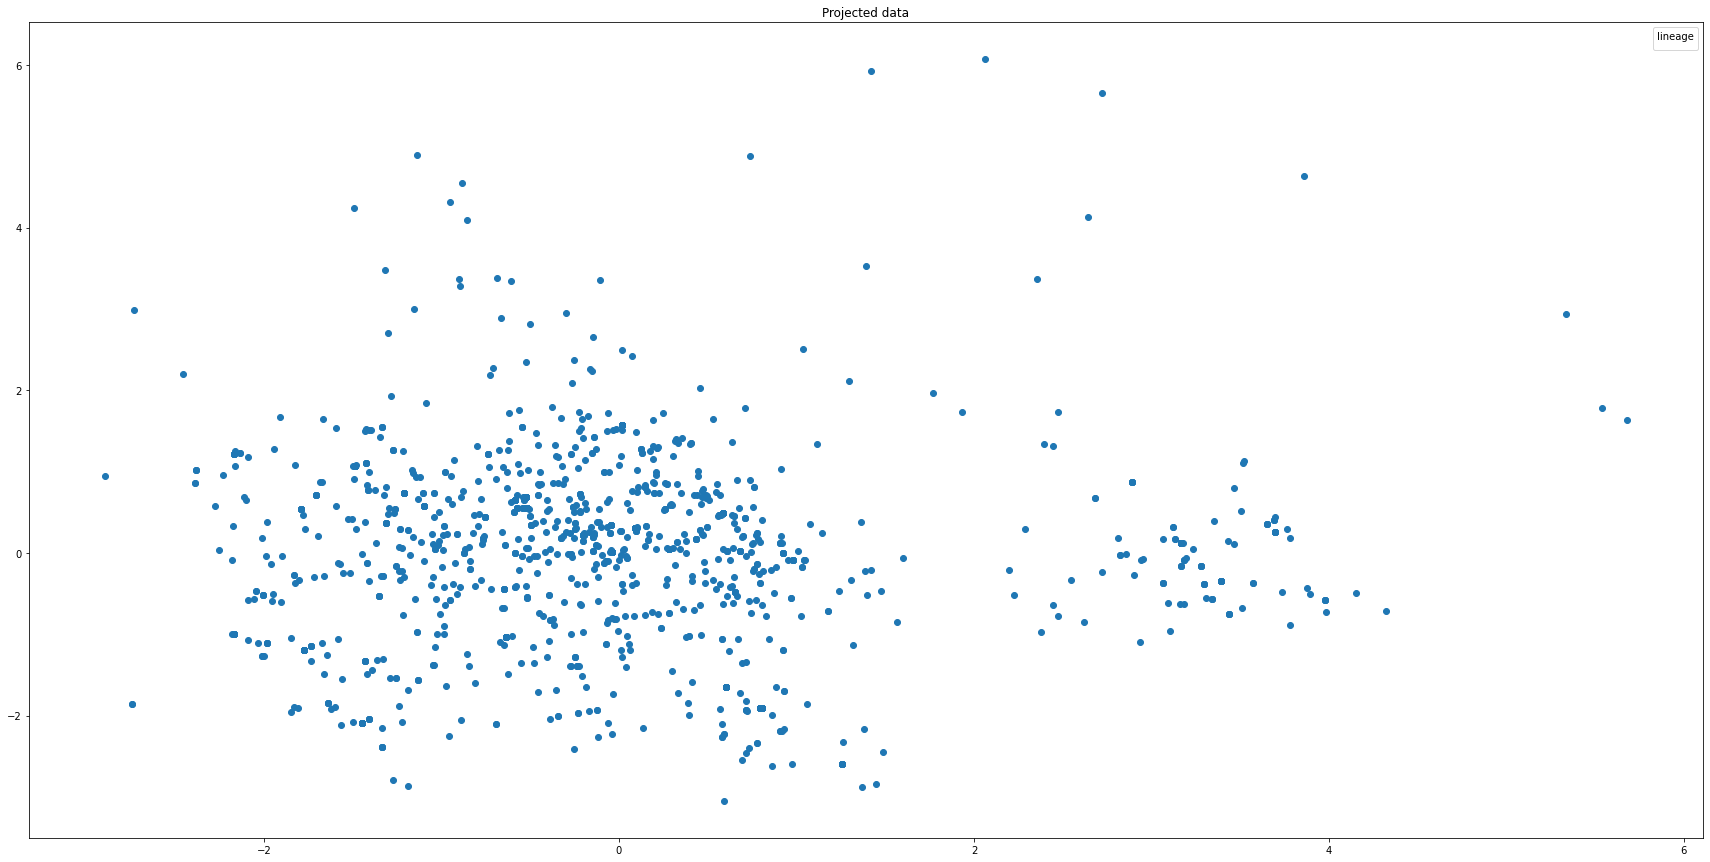

In [16]:
import numpy as np
from sklearn.decomposition import PCA

x=nucl.iloc[:,1:]

pca = PCA(n_components=2)
pca.fit(x)

# Project data onto first two principal components
projX = pca.transform(x)
plt.figure(figsize=(30,15))

scatter = plt.scatter(projX[:,0],projX[:,1],cmap='rainbow')
plt.legend(handles=scatter.legend_elements()[0],labels = scatter.legend_elements()[1],
           title="lineage")
plt.title('Projected data')
plt.show()

In [17]:
from sklearn.cluster import KMeans  
kmeans=KMeans(n_clusters=2)   #n_clusters:number of cluster  
kmeans.fit(x)  

KMeans(n_clusters=2)

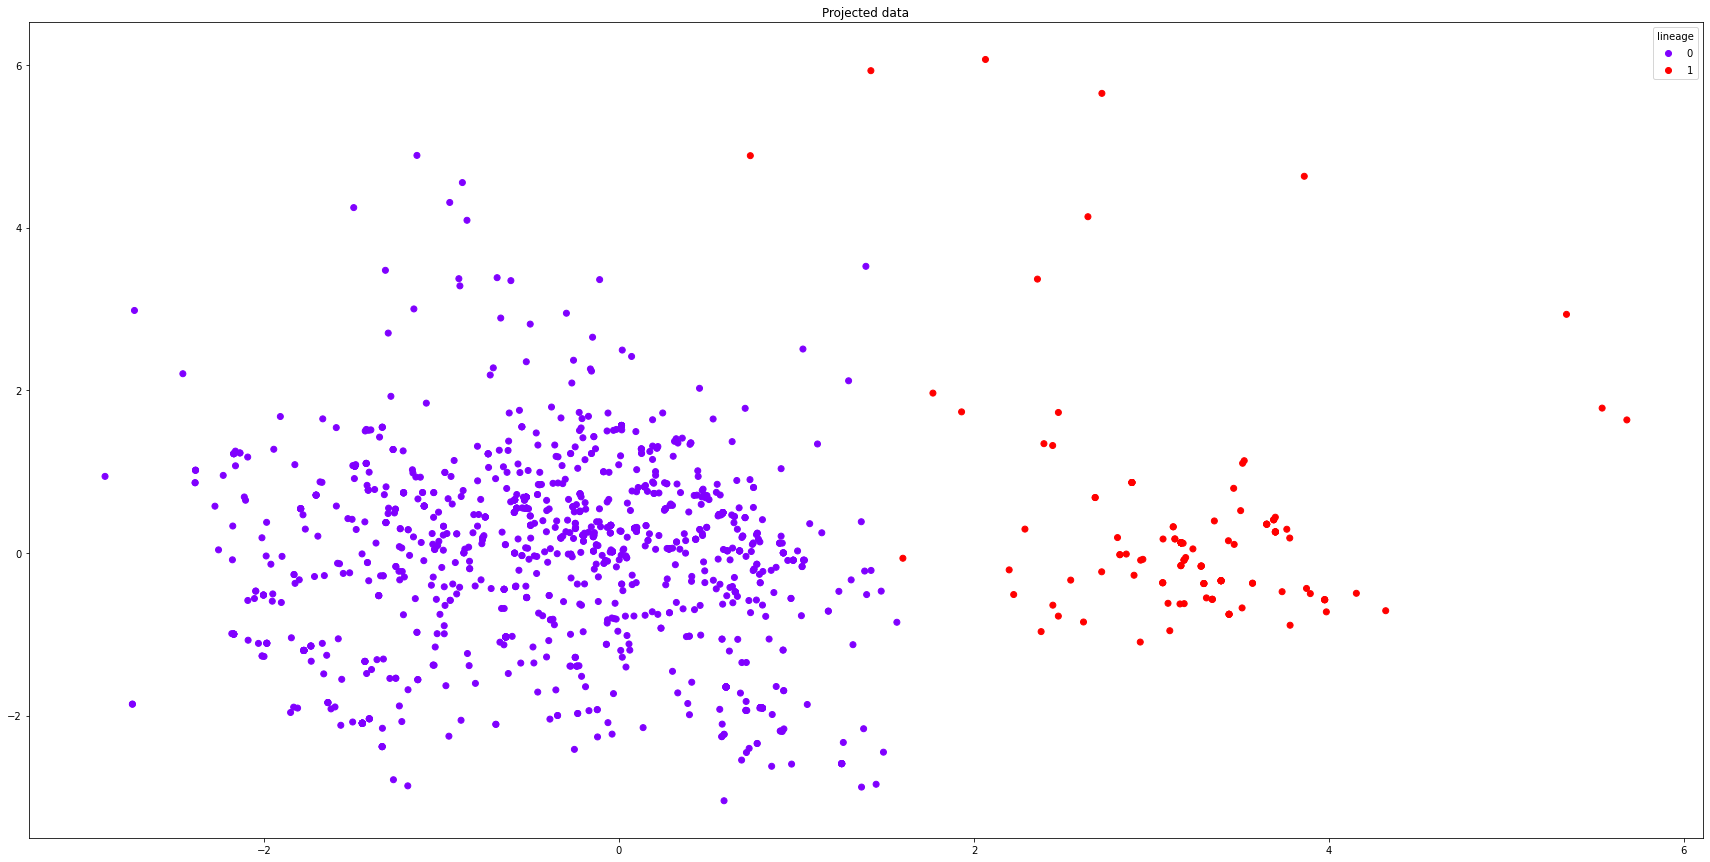

In [18]:
import matplotlib.pyplot as plt  
plt.figure(figsize=(30,15))
scatter = plt.scatter(projX[:,0],projX[:,1],c=kmeans.labels_,cmap='rainbow')
plt.legend(handles=scatter.legend_elements()[0],labels = scatter.legend_elements()[1],
           title="lineage")
plt.title('Projected data')
plt.show()

In [19]:
l = kmeans.labels_
nucl2 = nucl
nucl2['label'] = l
nucl2

,sample ID,outlier,NSP1,NSP2,NSP3,NSP4,NSP5,NSP6,NSP7,NSP8,...,ORF3a,E,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF10,label
0,V1000,2,0,2,5,0,0,1,0,0,...,0,0,0,0,1,0,3,9,0,0
1,V1001,2,0,1,6,0,0,2,1,0,...,2,0,0,0,0,0,3,7,0,0
2,V1002,2,0,2,6,0,0,1,0,0,...,1,0,0,0,0,0,3,7,1,0
3,V1003,3,0,1,7,0,0,1,1,0,...,1,0,0,0,0,0,3,5,0,1
4,V1004,2,1,2,7,0,0,2,0,0,...,0,0,0,0,0,0,3,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,V995,2,1,2,5,0,0,2,0,0,...,1,0,0,0,0,0,3,7,0,0
1273,V996,2,0,1,6,0,0,2,0,0,...,0,0,0,0,0,0,3,7,0,0
1274,V997,2,0,2,8,0,0,1,1,0,...,1,0,1,0,0,0,4,5,0,1
1275,V998,2,1,2,5,0,0,2,0,0,...,0,0,0,0,0,0,3,8,0,0


In [23]:
outputpath = 'C:/Users/Aral/Desktop/B.1.1.7_LABEL.csv'
#nucl2.to_csv(outputpath, sep=',',index=False,mode='a')

target0

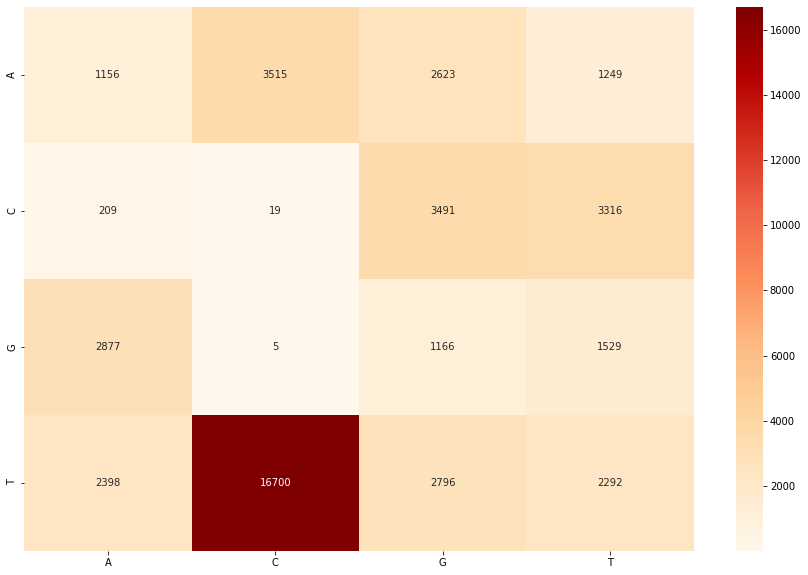

In [20]:
target0 = list(nucl2['sample ID'][nucl2['label']==0])
nucleotide_record = {'A':{'A':0,'C':0,'G':0,'T':0},'C':{'A':0,'C':0,'G':0,'T':0},
          'G':{'A':0,'C':0,'G':0,'T':0},'T':{'A':0,'C':0,'G':0,'T':0}}
nucleotide = ['A','C','G','T']
for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target0:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for record in test:
                if record.ALT[0] in nucleotide:
                    if record.REF[0] in nucleotide:
                        nucleotide_record[record.REF[0]][str(record.ALT[0])]+=1

df = pd.DataFrame(nucleotide_record, index=nucleotide, columns=nucleotide)
plt.figure(figsize=(15,10))
sns.heatmap(df, annot=True, fmt='d',cmap="OrRd",annot_kws={'size':10})
plt.show()

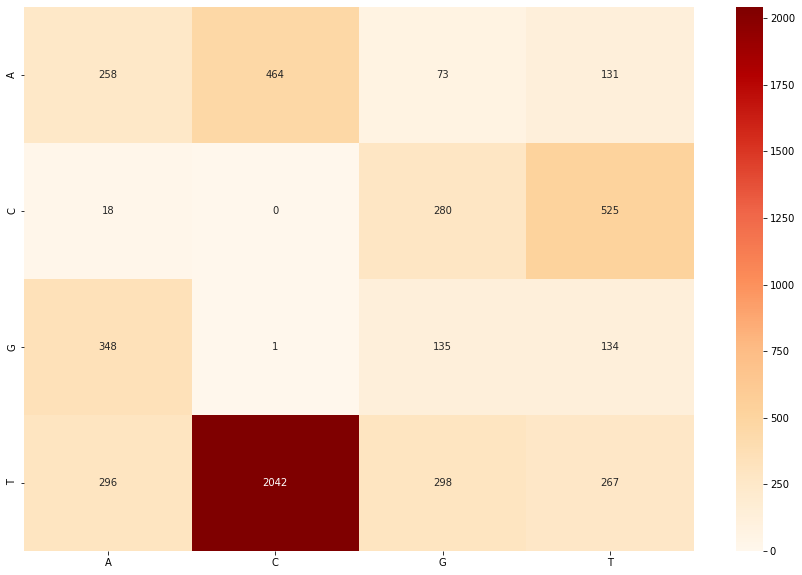

In [21]:
target1 = list(nucl2['sample ID'][nucl2['label']==1])
nucleotide_record = {'A':{'A':0,'C':0,'G':0,'T':0},'C':{'A':0,'C':0,'G':0,'T':0},
          'G':{'A':0,'C':0,'G':0,'T':0},'T':{'A':0,'C':0,'G':0,'T':0}}
nucleotide = ['A','C','G','T']
for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target1:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for record in test:
                if record.ALT[0] in nucleotide:
                    if record.REF[0] in nucleotide:
                        nucleotide_record[record.REF[0]][str(record.ALT[0])]+=1

df = pd.DataFrame(nucleotide_record, index=nucleotide, columns=nucleotide)
plt.figure(figsize=(15,10))
sns.heatmap(df, annot=True, fmt='d',cmap="OrRd",annot_kws={'size':10})
plt.show()

# Remove the Defining mutations in VOC-202012/01

In [23]:
df = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv').dropna()
target = list(df[df['lineage']=='B.1.1.7']['INAB sample ID'])
file_dir = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files'
def getFlist(path):
    f = []
    for root, dirs, files in os.walk(file_dir):
        f.append(files)
    return f
file_name = getFlist(file_dir)[0]

In [24]:
def_mutations = [3267,5388,6954,11288,11289,11290,11291,11292,11293,11294,11295,11296,
                21765,21766,21767,21768,21769,21770,21991,21992,21993,23063,23271,23604
                ,23709,24506,24914,27972,28048,28111,28280,28977]

nucl_pos = [265,805,2719,8554,10054,10972,11842,12091,12685,13024,
            13441,13468,16236,18039,19620,20658,21552,21562,
            25384,25392,26220,26244,26472,26522,27191,27201,27387,
            27393,27759,27887,27893,28259,28273,29533,29557,29674,29903]


label = ['outlier','NSP1','NSP2','NSP3','NSP4','NSP5','NSP6','NSP7','NSP8','NSP9',
        'NSP10','NSP12a','NSP12b','NSP13','NSP14','NSP15','NSP16','outlier',
        'S','outlier','ORF3a','outlier','E','outlier','M','outlier','ORF6',
        'outlier','ORF7a','ORF7b','outlier','ORF8','outlier','N','outlier','ORF10','outlier']

In [25]:
nucl_dict = {}
for i in label:
    nucl_dict[i] = 0
attr2 = list(nucl_dict.keys())

In [26]:
nucl = []

for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            nucl_dict = {}
            for i in label:
                nucl_dict[i] = 0
            for record in test:
                if record.POS not in def_mutations:
                    nucl_dict[label[bisect_left(nucl_pos,record.POS)]]+=1
            c = list(nucl_dict.values())
            c = t + c
            nucl.append(c)

In [27]:
nucl_remove_def = pd.DataFrame(nucl)
nucl_remove_def.columns = (['sample ID']+attr2)
nucl_remove_def

,sample ID,outlier,NSP1,NSP2,NSP3,NSP4,NSP5,NSP6,NSP7,NSP8,...,S,ORF3a,E,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF10
0,V1000,2,0,2,2,0,0,1,0,0,...,7,0,0,0,0,1,0,0,7,0
1,V1001,2,0,1,3,0,0,2,1,0,...,3,2,0,0,0,0,0,0,5,0
2,V1002,2,0,2,3,0,0,1,0,0,...,4,1,0,0,0,0,0,0,5,1
3,V1003,3,0,1,4,0,0,1,1,0,...,3,1,0,0,0,0,0,0,3,0
4,V1004,2,1,2,4,0,0,2,0,0,...,3,0,0,0,0,0,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,V995,2,1,2,2,0,0,2,0,0,...,4,1,0,0,0,0,0,0,5,0
1273,V996,2,0,1,3,0,0,2,0,0,...,4,0,0,0,0,0,0,0,5,0
1274,V997,2,0,2,5,0,0,1,1,0,...,3,1,0,1,0,0,0,1,3,0
1275,V998,2,1,2,2,0,0,2,0,0,...,3,0,0,0,0,0,0,0,6,0


C:\Users\Aral\Anaconda3\lib\site-packages\matplotlib\collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


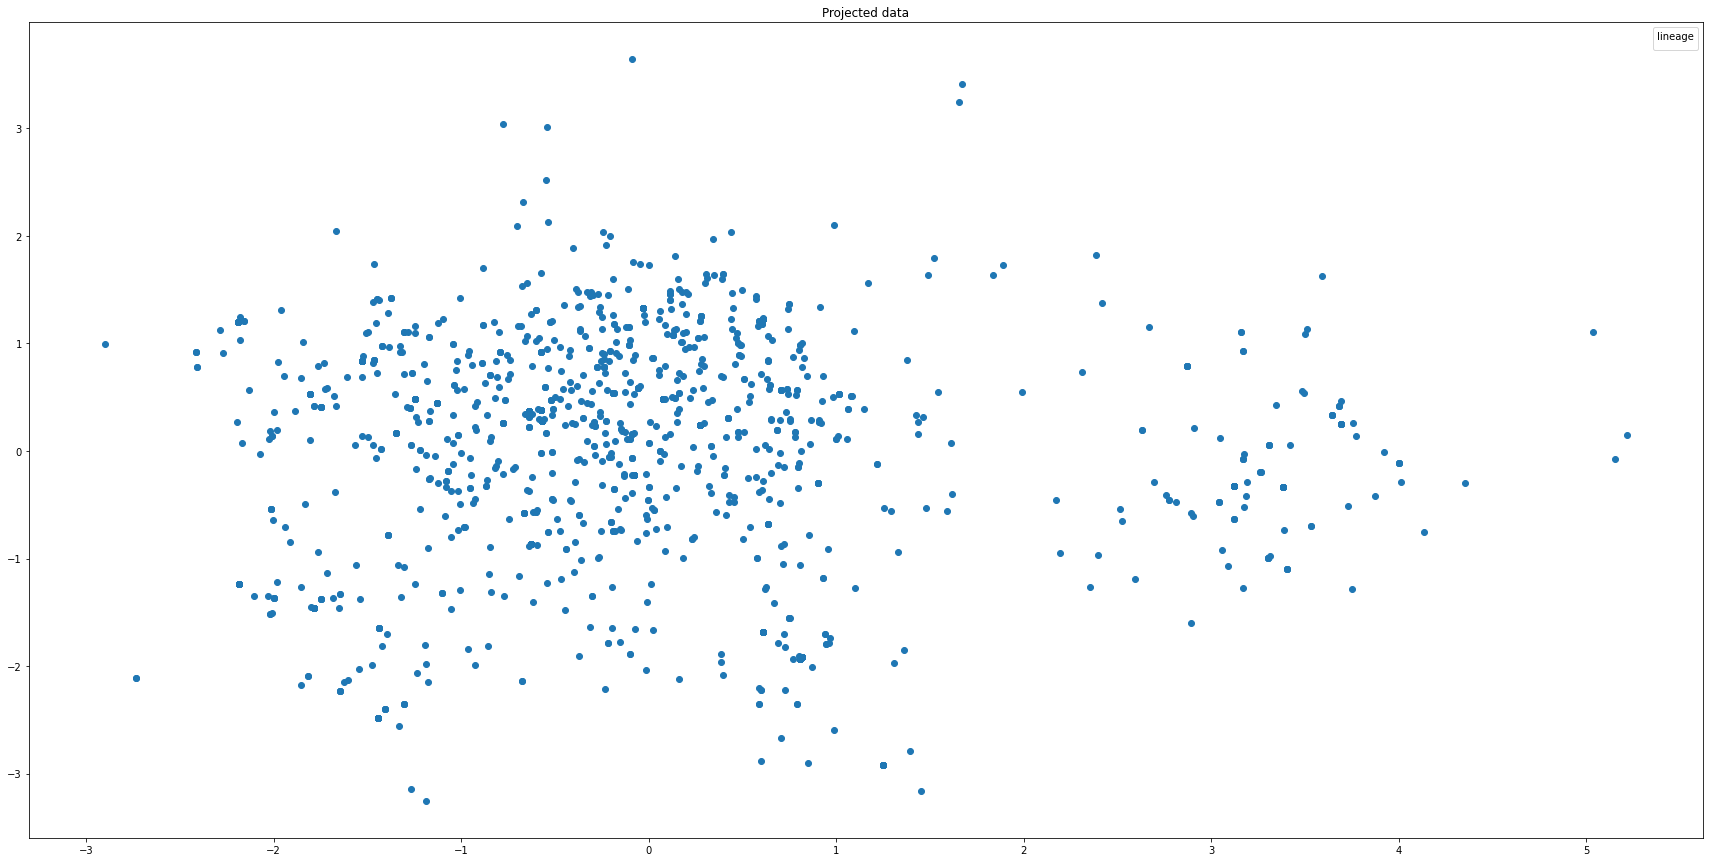

In [28]:
import numpy as np
from sklearn.decomposition import PCA

x=nucl_remove_def.iloc[:,1:]

pca = PCA(n_components=2)
pca.fit(x)

# Project data onto first two principal components
projX = pca.transform(x)
plt.figure(figsize=(30,15))

scatter = plt.scatter(projX[:,0],projX[:,1],cmap='rainbow')
plt.legend(handles=scatter.legend_elements()[0],labels = scatter.legend_elements()[1],
           title="lineage")
plt.title('Projected data')
plt.show()

In [29]:
from sklearn.cluster import KMeans  
kmeans=KMeans(n_clusters=2)   #n_clusters:number of cluster  
kmeans.fit(x)  

KMeans(n_clusters=2)

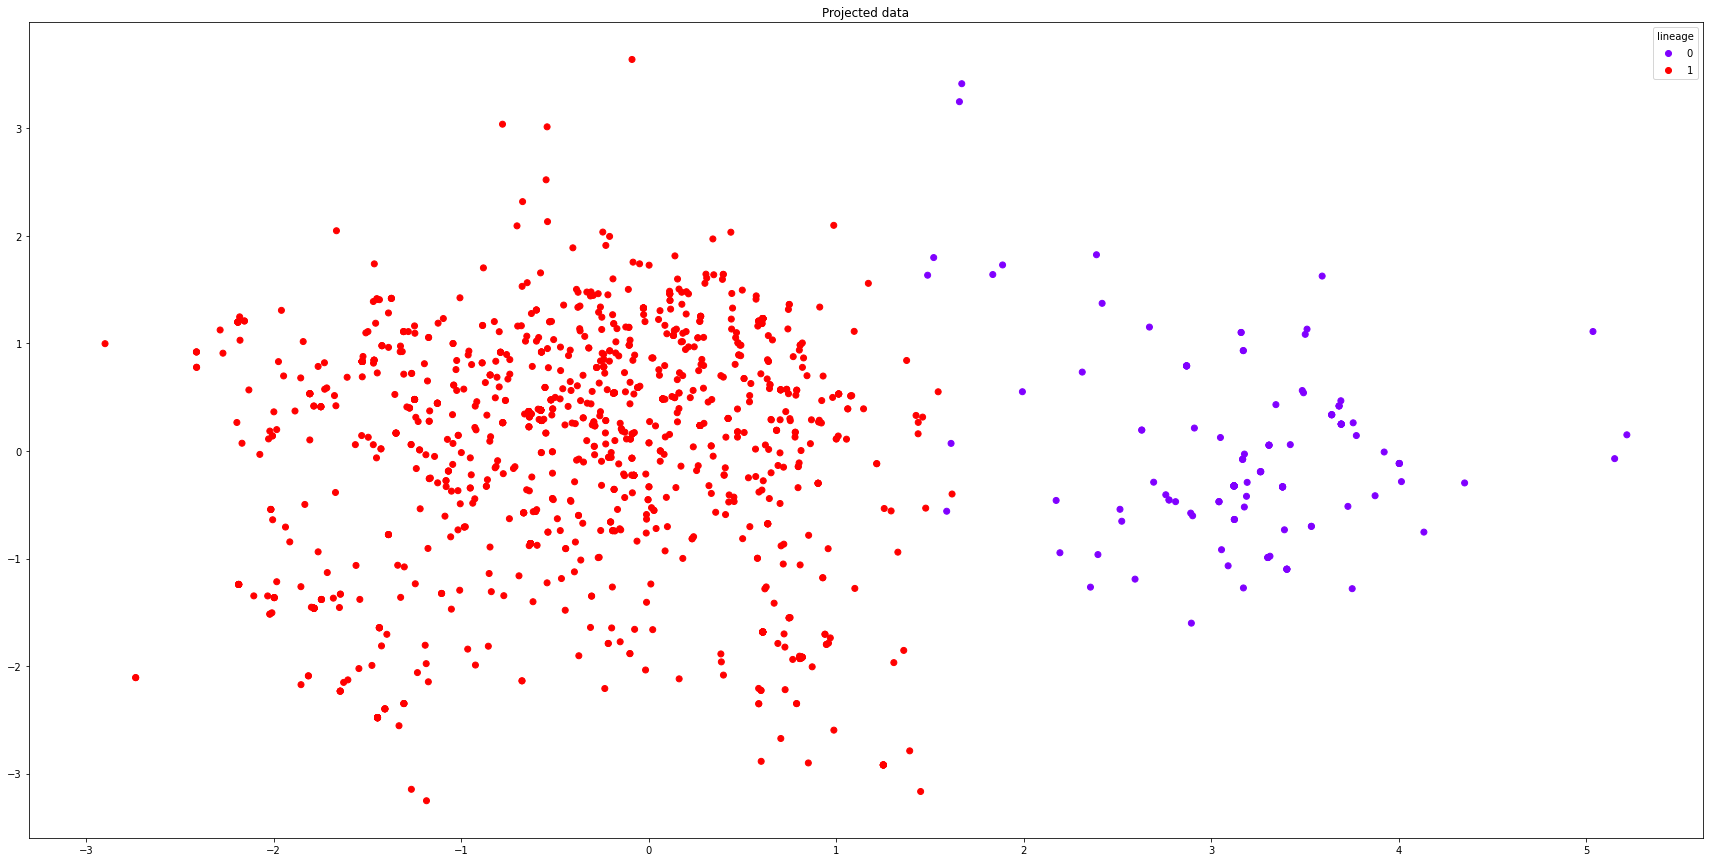

In [30]:
import matplotlib.pyplot as plt  
plt.figure(figsize=(30,15))
scatter = plt.scatter(projX[:,0],projX[:,1],c=kmeans.labels_,cmap='rainbow')
plt.legend(handles=scatter.legend_elements()[0],labels = scatter.legend_elements()[1],
           title="lineage")
plt.title('Projected data')
plt.show()

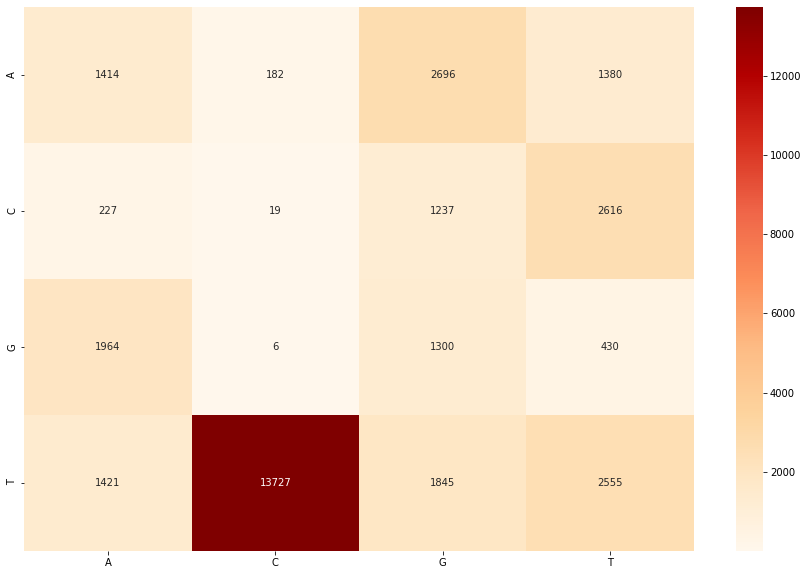

In [31]:
nucleotide_record = {'A':{'A':0,'C':0,'G':0,'T':0},'C':{'A':0,'C':0,'G':0,'T':0},
          'G':{'A':0,'C':0,'G':0,'T':0},'T':{'A':0,'C':0,'G':0,'T':0}}
nucleotide = ['A','C','G','T']
for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for record in test:
                if record.POS not in def_mutations:
                    if record.ALT[0] in nucleotide:
                        if record.REF[0] in nucleotide:
                            nucleotide_record[record.REF[0]][str(record.ALT[0])]+=1

df = pd.DataFrame(nucleotide_record, index=nucleotide, columns=nucleotide)
plt.figure(figsize=(15,10))
sns.heatmap(df, annot=True, fmt='d',cmap="OrRd",annot_kws={'size':10})
plt.show()

S protein

In [32]:
s_nucl = []
s_pos_count = {}
for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            c = []
            for record in test:
                if record.POS not in def_mutations:
                    if record.POS >= 21563 and record.POS <= 25384:
                        c.append(record.POS)
                        if record.POS not in s_pos_count:
                            s_pos_count[record.POS] = 1
                        else:
                            s_pos_count[record.POS] += 1
            s_nucl.append(c)

observe more than 10 mutations

In [33]:
for i in list(s_pos_count.keys()):
    if s_pos_count[i] < 10:
        del(s_pos_count[i])
s_pos_count

{21575: 53,
 21764: 1259,
 21990: 1272,
 23403: 1269,
 24814: 36,
 25218: 38,
 23277: 91,
 21691: 12,
 21807: 63,
 25026: 70,
 22104: 21,
 21761: 11,
 23441: 21,
 24378: 21,
 23419: 55,
 22747: 46,
 21855: 24,
 24004: 11,
 23084: 63}

In [34]:
s_tar = list(s_pos_count.keys())
sample_ID = []
s_tar

[21575,
 21764,
 21990,
 23403,
 24814,
 25218,
 23277,
 21691,
 21807,
 25026,
 22104,
 21761,
 23441,
 24378,
 23419,
 22747,
 21855,
 24004,
 23084]

In [35]:
s_fin = []

for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            c = np.zeros(len(s_tar))
            for record in test:
                if record.POS in s_tar:
                    c[s_tar.index(record.POS)] += 1
            sample_ID.append(t[0])
            s_fin.append(c)

In [36]:
s_df = pd.DataFrame(s_fin)
s_tar = [str(x) for x in s_tar]
s_df.columns = s_tar
s_df['sample name'] = sample_ID
outputpath = 'C:/Users/Aral/Desktop/B.1.1.7_S_por.csv'
#s_df.to_csv(outputpath, sep=',',index=False,mode='a')

In [38]:
s_df

,21575,21764,21990,23403,24814,25218,23277,21691,21807,25026,22104,21761,23441,24378,23419,22747,21855,24004,23084,sample name
0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,V1000
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,V1001
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,V1002
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,V1003
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,V1004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,V995
1273,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,V996
1274,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,V997
1275,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,V998


In [37]:
col_df = pd.read_csv('collect - 副本.csv')
col_df

,ENA first public,ENA last update,Submitter Id,collection date,common name,geographic location (country and/or sea),geographic location (region and locality),host common name,host health state,host sex,sample name
0,2021-06-12,2021-06-12,V1230,2021-05-17,SARS-CoV-2,Greece,Thessaloniki,human,not provided,male,V1230
1,2021-06-12,2021-06-12,V1217,2021-05-20,SARS-CoV-2,Greece,Kozani,human,not provided,female,V1217
2,2021-06-12,2021-06-12,V1197,2021-05-15,SARS-CoV-2,Greece,Grevena,human,not provided,female,V1197
3,2021-06-10,2021-06-10,V1465,2021-05-27,SARS-CoV-69,Greece,Thessaloniki,human,not provided,not provided,V1465
4,2021-06-10,2021-06-10,V1464,2021-05-27,SARS-CoV-69,Greece,Thessaloniki,human,not provided,not provided,V1464
...,...,...,...,...,...,...,...,...,...,...,...
2967,2021-08-09,2021-08-09,V2662,2021-07-23,SARS-CoV-2,Greece,Thessaloniki,human,not provided,not provided,V2662
2968,2021-08-09,2021-08-09,V2661,2021-07-23,SARS-CoV-2,Greece,Thessaloniki,human,not provided,female,V2661
2969,2021-08-09,2021-08-09,V2660,2021-07-23,SARS-CoV-2,Greece,Thessaloniki,human,not provided,female,V2660
2970,2021-08-09,2021-08-09,V2659,2021-07-23,SARS-CoV-2,Greece,Thessaloniki,human,not provided,male,V2659


In [64]:
df_merge =s_df.merge(col_df,on=['sample name'])
outputpath = 'C:/Users/Aral/Desktop/B.1.1.7_S_por.csv'
#df_merge.to_csv(outputpath, sep=',',index=False,mode='a')

Select Feature

In [6]:
def_mutations = [3267,5388,6954,11288,11289,11290,11291,11292,11293,11294,11295,11296,
                21765,21766,21767,21768,21769,21770,21991,21992,21993,23063,23271,23604
                ,23709,24506,24914,27972,28048,28111,28280,28977]

df = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df = df.dropna()

file_dir = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files'
def getFlist(path):
    f = []
    for root, dirs, files in os.walk(file_dir):
        f.append(files)
    return f
file_name = getFlist(file_dir)[0]

pos_record = {}
target2 = list(df[df['lineage']=='B.1.1.7']['INAB sample ID'])
for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target2:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for record in test:
                if record.POS not in pos_record:
                    pos_record[record.POS] = 1
                else:
                    pos_record[record.POS] += 1

res = sorted(pos_record.items(),key = lambda item:item[1],reverse=True)
sor_res = {str(k):v for k,v in res}
sor_res

{'14408': 1277,
 '23063': 1273,
 '24914': 1273,
 '21990': 1272,
 '16176': 1270,
 '3037': 1269,
 '5388': 1269,
 '23403': 1269,
 '28270': 1267,
 '11287': 1266,
 '23709': 1266,
 '28281': 1266,
 '23604': 1265,
 '28280': 1264,
 '28977': 1264,
 '23271': 1263,
 '28282': 1263,
 '28111': 1262,
 '21764': 1259,
 '15279': 1256,
 '5986': 1251,
 '27972': 1250,
 '28048': 1249,
 '913': 1247,
 '14676': 1246,
 '3267': 1235,
 '24506': 1233,
 '241': 1230,
 '6954': 1225,
 '28881': 1136,
 '28883': 1135,
 '28882': 1134,
 '682': 462,
 '1441': 449,
 '11522': 362,
 '5284': 182,
 '28739': 182,
 '15096': 144,
 '28880': 139,
 '12970': 128,
 '19482': 125,
 '16726': 118,
 '28657': 111,
 '27389': 96,
 '29077': 94,
 '1746': 92,
 '3646': 92,
 '23277': 91,
 '88': 91,
 '27059': 89,
 '3933': 88,
 '29543': 88,
 '11650': 86,
 '11750': 83,
 '12235': 74,
 '2119': 71,
 '905': 70,
 '25638': 70,
 '25026': 70,
 '17733': 65,
 '7684': 64,
 '21807': 63,
 '3706': 63,
 '2272': 63,
 '3728': 63,
 '17502': 63,
 '18384': 63,
 '23084': 63,

In [8]:
len(list(sor_res.keys()))

1525

In [9]:
sor_res_filter = dict(filter(lambda x: x[1] >= 2,sor_res.items()))
pos2 = list(sor_res_filter.keys())
len(pos2)

801

In [10]:
pos2 = list(sor_res_filter.keys())
df2 = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df2 = df2.dropna()

x2 = []
for i in range(len(file_name)):
    tar = [0]*len(pos2)
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target2:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for p in test:
                if str(p.POS) in pos2:
                    if p.ALT[0] == 'A':
                        tar[pos2.index(str(p.POS))] = 1
                    if p.ALT[0] == 'C':
                        tar[pos2.index(str(p.POS))] = 2
                    if p.ALT[0] == 'G':
                        tar[pos2.index(str(p.POS))] = 3
                    if p.ALT[0] == 'T':
                        tar[pos2.index(str(p.POS))] = 4
            x2.append(tar)

B117 = pd.DataFrame(x2)
B117.columns = pos2
B117

,14408,23063,24914,21990,16176,3037,5388,23403,28270,11287,...,8240,12374,27987,29440,6706,10646,27261,1839,26158,28665
0,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
1,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
2,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
3,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
4,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
1273,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
1274,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,3,0
1275,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0


C:\Users\Aral\Anaconda3\lib\site-packages\matplotlib\collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


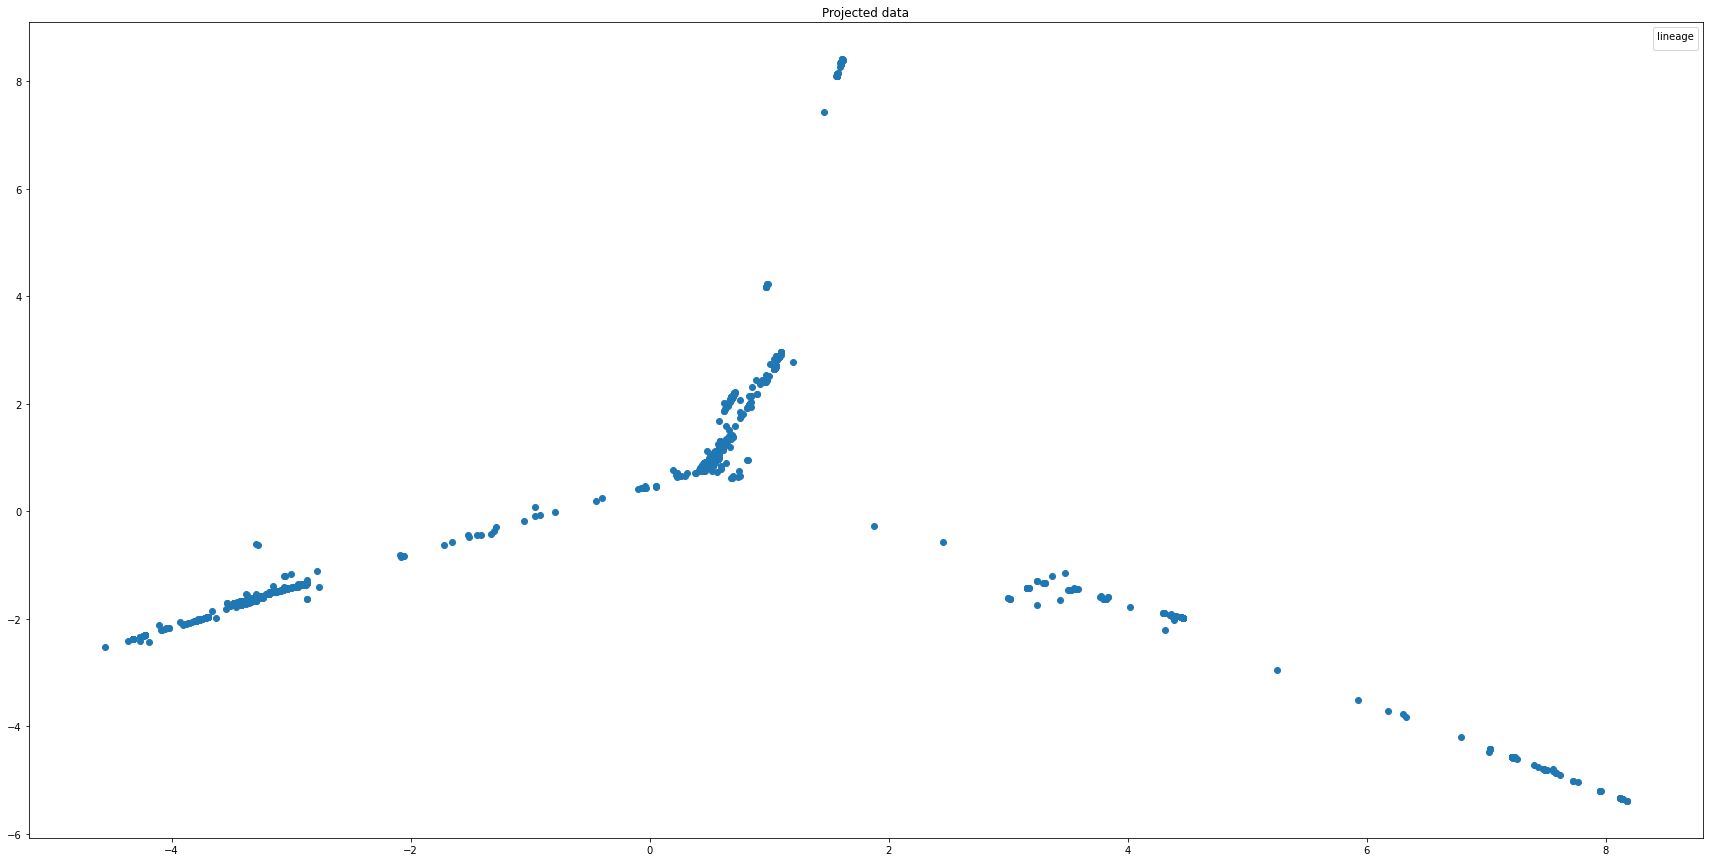

In [41]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(B117.iloc[:,:-1])

# Project data onto first two principal components
projX = pca.transform(B117.iloc[:,:-1])
plt.figure(figsize=(30,15))

scatter = plt.scatter(projX[:,0],projX[:,1],cmap='rainbow')
plt.legend(handles=scatter.legend_elements()[0],labels = scatter.legend_elements()[1],
           title="lineage")
plt.title('Projected data')
plt.show()

获取每个点到聚类中心的距离和

In [42]:
Kmeans = KMeans(n_clusters=1)
Kmeans.fit(B117)
Kmeans.inertia_

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  "KMeans is known to have a memory leak on Windows "


120446.67345340646

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


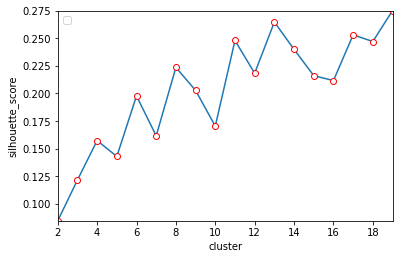

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

y = []
x = []

def Silhouette_ALL(n,data):
    kmeans = KMeans(n_clusters=n)
    result_list = kmeans.fit_predict(data)
    score = silhouette_score(data, result_list)
    return score
    
for n in range(2,20):                                             #遍历不同k值下轮廓系数
    data_data_Silhouette_mean = Silhouette_ALL(n,B117)
    x.append(n)
    y.append(data_data_Silhouette_mean)

plt.plot(x, y, marker='o', mec='r', mfc='w')
plt.legend() 
plt.margins(0)
plt.subplots_adjust(bottom=0.15)
plt.xlabel(u"cluster") #X轴标签
plt.ylabel("silhouette_score") #Y轴标签 
plt.show()

Unsupervised Select Features

test unsupervised select features

In [11]:
df = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df = df.dropna()

file_dir = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files'
def getFlist(path):
    f = []
    for root, dirs, files in os.walk(file_dir):
        f.append(files)
    return f
file_name = getFlist(file_dir)[0]

pos_record = {}
target2 = list(df[df['lineage']=='B.1.1.7']['INAB sample ID'])
for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target2:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for record in test:
                if record.POS not in pos_record:
                    pos_record[record.POS] = 1
                else:
                    pos_record[record.POS] += 1

res = sorted(pos_record.items(),key = lambda item:item[1],reverse=True)
sor_res = {str(k):v for k,v in res}
sor_res

{'14408': 1277,
 '23063': 1273,
 '24914': 1273,
 '21990': 1272,
 '16176': 1270,
 '3037': 1269,
 '5388': 1269,
 '23403': 1269,
 '28270': 1267,
 '11287': 1266,
 '23709': 1266,
 '28281': 1266,
 '23604': 1265,
 '28280': 1264,
 '28977': 1264,
 '23271': 1263,
 '28282': 1263,
 '28111': 1262,
 '21764': 1259,
 '15279': 1256,
 '5986': 1251,
 '27972': 1250,
 '28048': 1249,
 '913': 1247,
 '14676': 1246,
 '3267': 1235,
 '24506': 1233,
 '241': 1230,
 '6954': 1225,
 '28881': 1136,
 '28883': 1135,
 '28882': 1134,
 '682': 462,
 '1441': 449,
 '11522': 362,
 '5284': 182,
 '28739': 182,
 '15096': 144,
 '28880': 139,
 '12970': 128,
 '19482': 125,
 '16726': 118,
 '28657': 111,
 '27389': 96,
 '29077': 94,
 '1746': 92,
 '3646': 92,
 '23277': 91,
 '88': 91,
 '27059': 89,
 '3933': 88,
 '29543': 88,
 '11650': 86,
 '11750': 83,
 '12235': 74,
 '2119': 71,
 '905': 70,
 '25638': 70,
 '25026': 70,
 '17733': 65,
 '7684': 64,
 '21807': 63,
 '3706': 63,
 '2272': 63,
 '3728': 63,
 '17502': 63,
 '18384': 63,
 '23084': 63,

In [12]:
sor_res_filter = dict(filter(lambda x: x[1] >= 2,sor_res.items()))
pos3 = list(sor_res_filter.keys())
df2 = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df2 = df2.dropna()

x2 = []
for i in range(len(file_name)):
    tar = [0]*len(pos3)
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target2:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for p in test:
                if str(p.POS) in pos3:
                    if p.ALT[0] == 'A':
                        tar[pos3.index(str(p.POS))] = 1
                    if p.ALT[0] == 'C':
                        tar[pos3.index(str(p.POS))] = 2
                    if p.ALT[0] == 'G':
                        tar[pos3.index(str(p.POS))] = 3
                    if p.ALT[0] == 'T':
                        tar[pos3.index(str(p.POS))] = 4
            x2.append(tar)

B117_test = pd.DataFrame(x2)
B117_test.columns = pos3
B117_test

,14408,23063,24914,21990,16176,3037,5388,23403,28270,11287,...,8240,12374,27987,29440,6706,10646,27261,1839,26158,28665
0,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
1,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
2,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
3,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
4,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
1273,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
1274,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,3,0
1275,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0


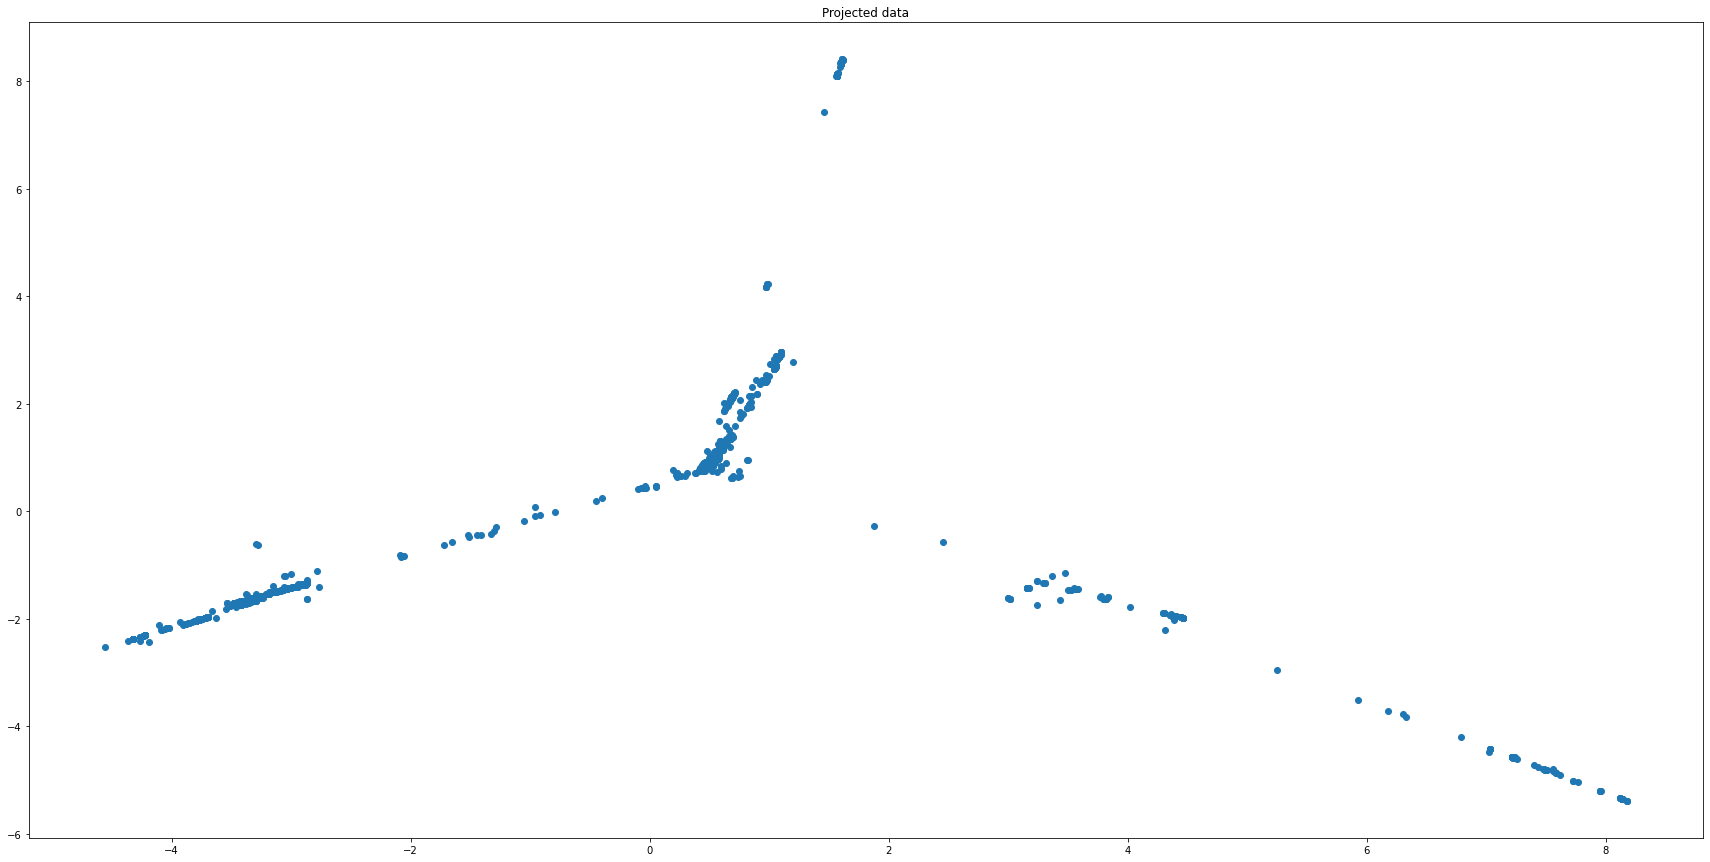

In [13]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(B117_test.iloc[:,:-1])

# Project data onto first two principal components
projX = pca.transform(B117_test.iloc[:,:-1])
plt.figure(figsize=(30,15))

scatter = plt.scatter(projX[:,0],projX[:,1],cmap='rainbow')

plt.title('Projected data')
plt.show()

In [14]:
def construct_W(X, neighbour_size = 5, t = 1):
    n_samples, n_features = np.shape(X)
    S=kneighbors_graph(X, neighbour_size+1, mode='distance',metric='euclidean') #sqecludian distance works only with mode=connectivity  results were absurd
    S = (-1*(S*S))/(2*t*t)
    S=S.tocsc()
    S=expm(S) # exponential
    S=S.tocsr()
    #[1]  M. Belkin and P. Niyogi, “Laplacian Eigenmaps and Spectral Techniques for Embedding and Clustering,” Advances in Neural Information Processing Systems,
    #Vol. 14, 2001. Following the paper to make the weights matrix symmetrix we use this method
    bigger = np.transpose(S) > S
    S = S - S.multiply(bigger) + np.transpose(S).multiply(bigger)
    return S

def LaplacianScore(X, neighbour_size = 5,  t = 1):
    W = construct_W(X,t=t,neighbour_size=neighbour_size)
    n_samples, n_features = np.shape(X)
    
    #construct the diagonal matrix
    D=np.array(W.sum(axis=1))
    D = scipy.sparse.diags(np.transpose(D), [0])
    #construct graph Laplacian L
    L=D-W.toarray()

    #construct 1= [1,···,1]' 
    I=np.ones((n_samples,n_features))

    #construct fr' => fr= [fr1,...,frn]'
    Xt = np.transpose(X)

    #construct fr^=fr-(frt D I/It D I)I
    t=np.matmul(np.matmul(Xt,D.toarray()),I)/np.matmul(np.matmul(np.transpose(I),D.toarray()),I)
    t=t[:,0]
    t=np.tile(t,(n_samples,1))
    fr=X-t

    #Compute Laplacian Score
    fr_t=np.transpose(fr)
    Lr=np.matmul(np.matmul(fr_t,L),fr)/np.matmul(np.dot(fr_t,D.toarray()),fr)

    return np.diag(Lr)


C:\Users\Aral\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


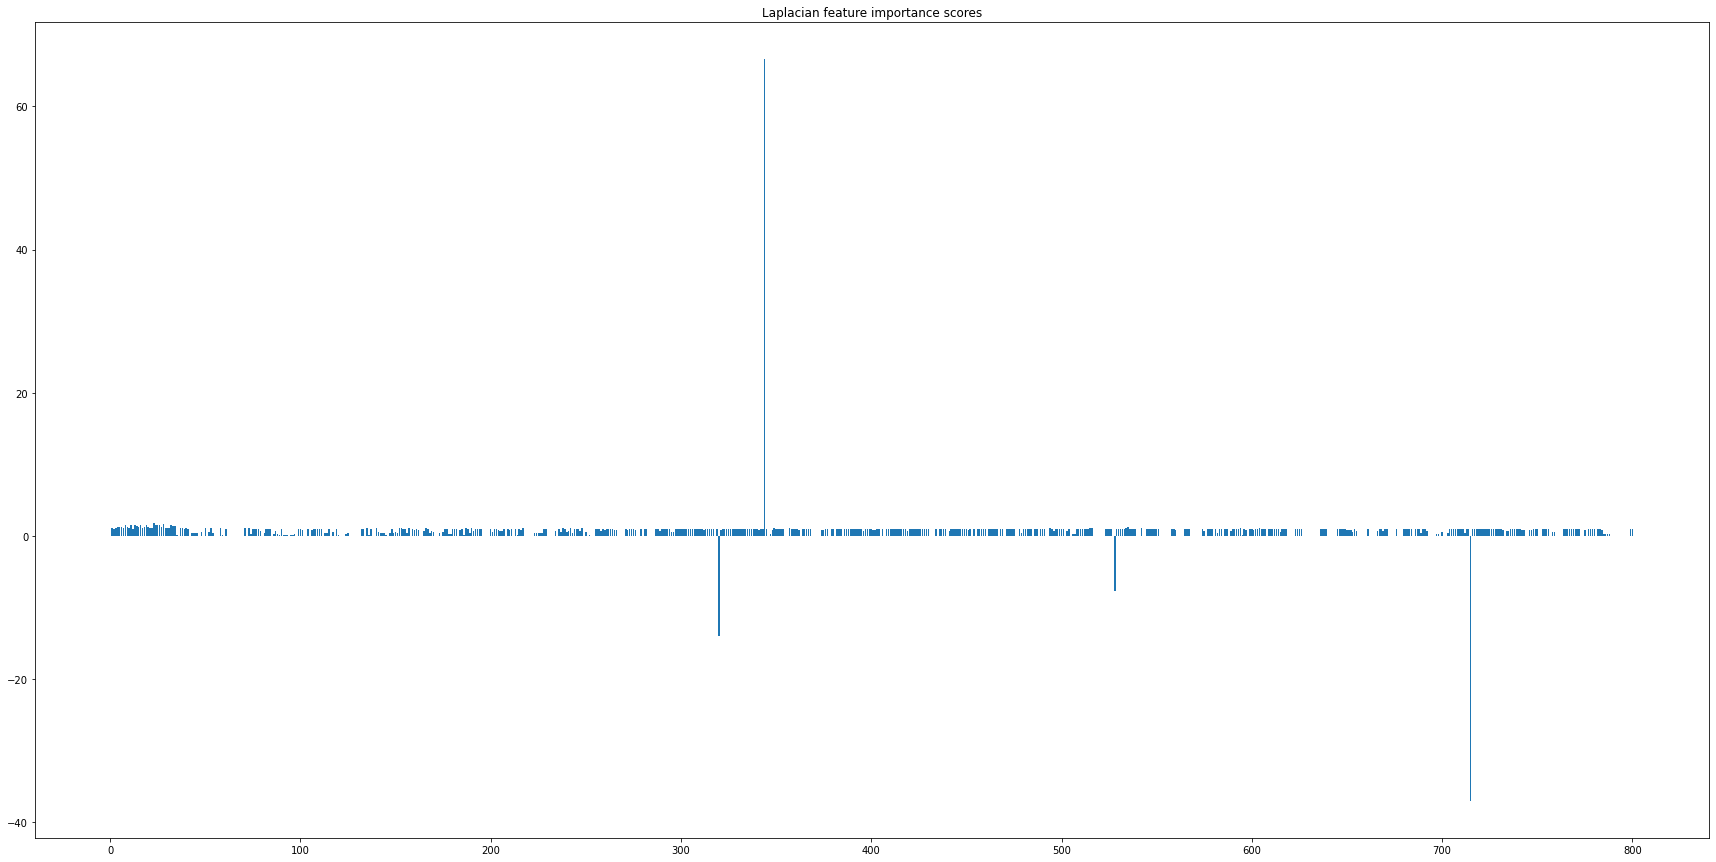

In [15]:
ls =LaplacianScore(np.array(B117_test.iloc[:,:]))
plt.figure(figsize=(30,15))
plt.title('Laplacian feature importance scores')
plt.bar(np.arange(np.array(B117_test.iloc[:,:]).shape[1]),ls);

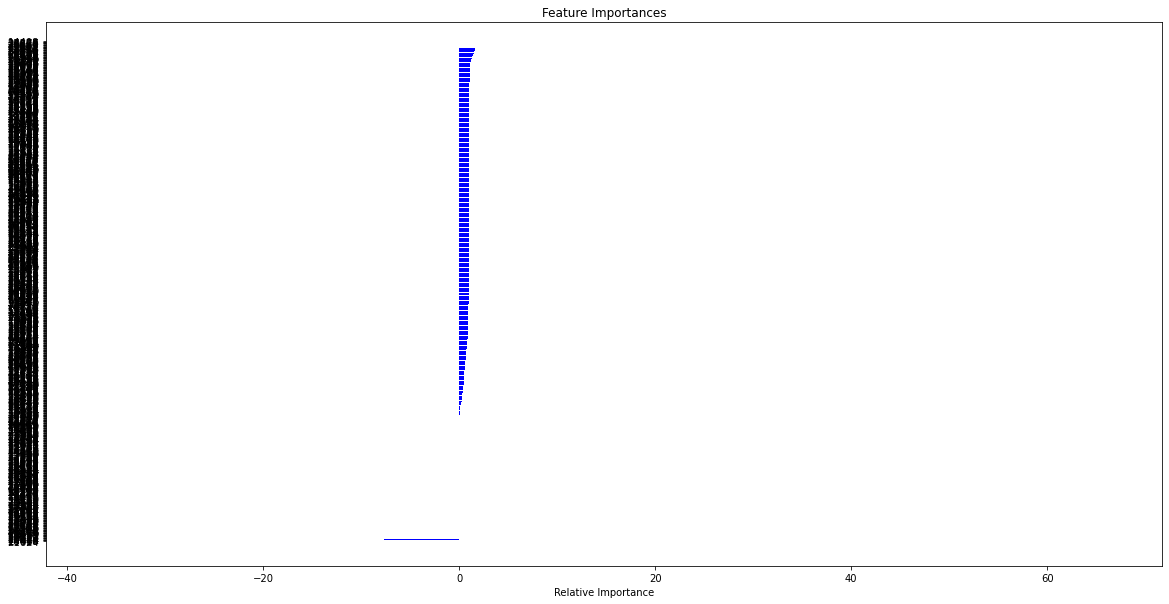

In [31]:
indices = np.argsort(ls)  # top 30 features
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)),ls[indices], color='b', align='center')
plt.yticks(range(len(indices)), [B117_test.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [26]:
B117_SEL = np.array(B117_test.iloc[:,:])[:,list(np.where( ls < 0.001)[0])]
Kmeans = KMeans(n_clusters=1)
Kmeans.fit(B117_SEL)
Kmeans.inertia_

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  "KMeans is known to have a memory leak on Windows "


28737.949882537225

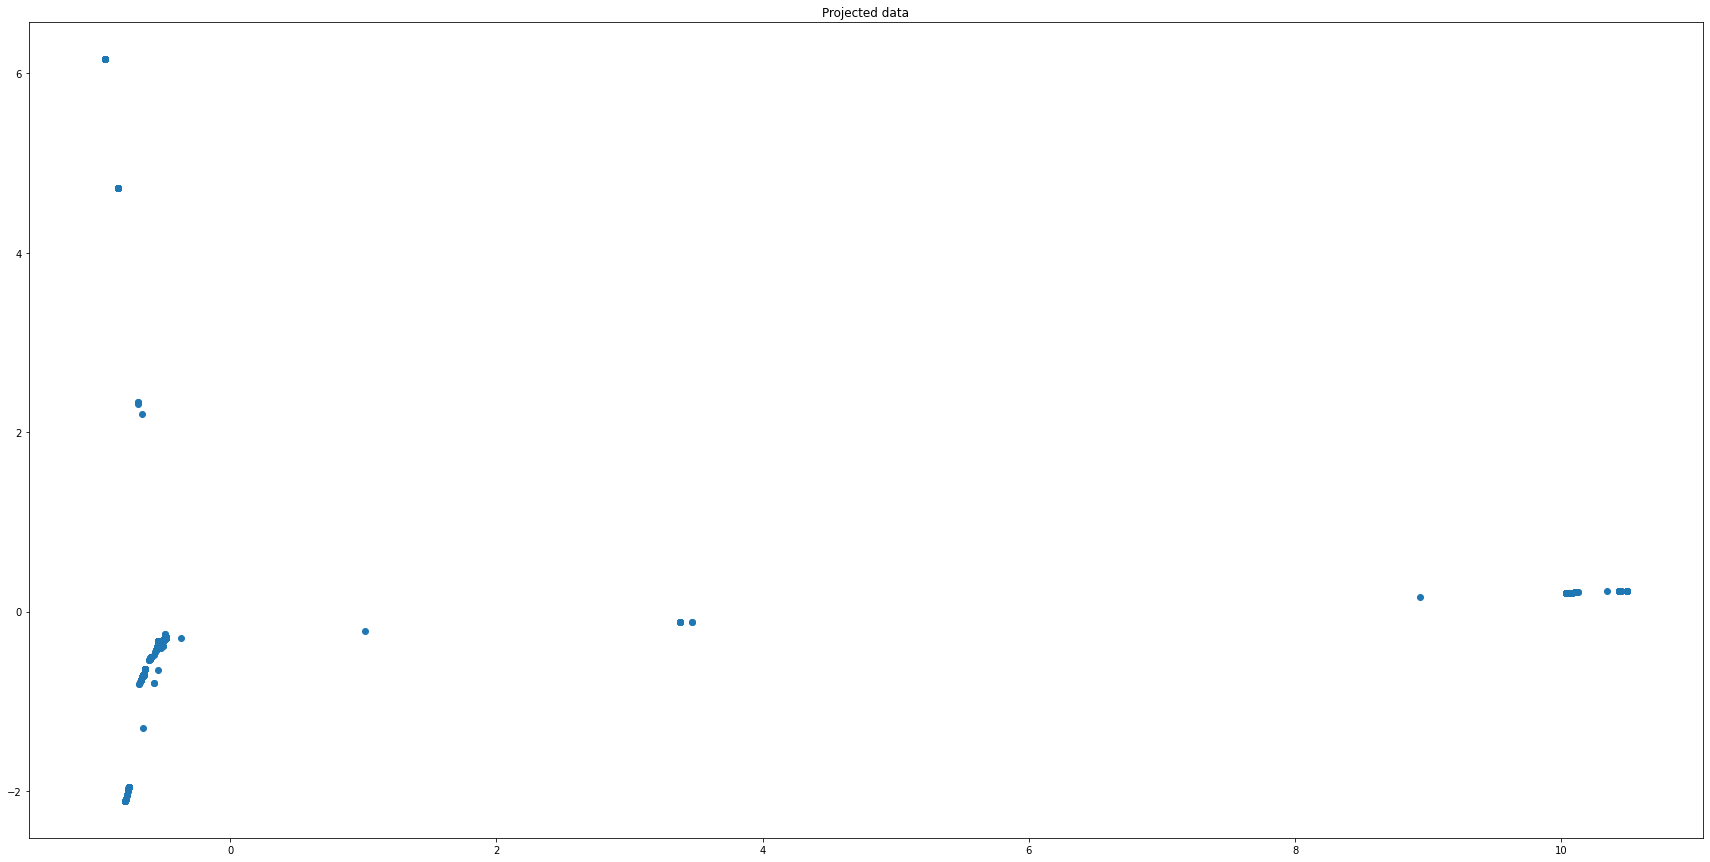

In [27]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(B117_SEL[:,:-1])

# Project data onto first two principal components
projX = pca.transform(B117_SEL[:,:-1])
plt.figure(figsize=(30,15))

scatter = plt.scatter(projX[:,0],projX[:,1],cmap='rainbow')

plt.title('Projected data')
plt.show()

In [32]:
B117_score = {}
for i in range(len(B117_test.columns)):
    
    if str(list(ls)[i]) != 'nan':
        B117_score[list(B117_test.columns)[i]] = list(ls)[i]
res = sorted(B117_score.items(),key = lambda item:item[1],reverse=False)
sor_res = {str(k):v for k,v in res}
sor_res

{'21624': -36.98079447927042,
 '18618': -13.915974035416486,
 '26469': -7.624204791064094,
 '7684': -0.0011285442952700178,
 '25818': -0.0005040112798038117,
 '28027': -2.335747606367861e-06,
 '29253': -1.470969511842295e-06,
 '17019': -4.005329642460948e-08,
 '6813': -8.639478195447213e-11,
 '7675': -8.639478195447213e-11,
 '23757': -8.639478195447213e-11,
 '23429': -1.290672262830668e-12,
 '8453': -9.813082824909354e-17,
 '27059': -4.0788845847758146e-17,
 '28657': -2.2854404062265795e-17,
 '3706': -1.1327753595845307e-17,
 '3178': -9.548330214782075e-18,
 '346': -7.982336490566984e-18,
 '16954': -7.982336490566984e-18,
 '16182': -1.761713483296737e-18,
 '2272': -2.192612418339175e-21,
 '3728': -2.192612418339175e-21,
 '17502': -2.192612418339175e-21,
 '18384': -2.192612418339175e-21,
 '23084': -2.192612418339175e-21,
 '27754': -2.192612418339175e-21,
 '15046': -1.1322713227946076e-21,
 '25481': -1.034275275954654e-21,
 '10702': -1.0046404814295688e-21,
 '5175': -5.171325219653559e-2

In [33]:
def_res = []
for i in range(len(list(sor_res.keys()))):
    if int((list(sor_res.keys())[i])) in def_mutations:
        def_res.append(i)
def_res

[109,
 251,
 495,
 720,
 752,
 758,
 759,
 762,
 763,
 767,
 773,
 776,
 781,
 784,
 785,
 788]

In [34]:
from fsfc.generic import MCFS
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

pipeline = Pipeline([
    ('select', MCFS(20,3)),
    ('cluster', KMeans())
])
pipeline.fit_predict(np.array(B117_test.iloc[:,:]))

ModuleNotFoundError: No module named 'fsfc'

In [ ]:
import numpy as np
import math
from sklearn.neighbors import kneighbors_graph
from sklearn.linear_model import LassoLars, Lars
from scipy.linalg import eigh
from fsfc.base import KBestFeatureSelector

In [143]:
x = np.array(B117_test.iloc[:,:])
clusters = 1
p=8
sigma=1
mode='default'
alpha=0.01

def create_regressor(mode,alpha):
    if mode == 'default':
        return Lars()
    if mode == 'lasso':
        return LassoLars(alpha=alpha)
    raise ValueError('Unexpected mode ' + mode + '. Expected "default" or "lasso"')

graph = kneighbors_graph(
            x,
            n_neighbors=p,
        )
        # Construct the heat matrix
w = np.zeros([x.shape[0], x.shape[0]])
rows, cols = graph.nonzero()
for i, j in zip(rows, cols):
    w[i, j] = math.exp(-np.linalg.norm(x[i] - x[j])**2/sigma)

# Compute degree and Laplacian matrices
degree_vector = np.sum(w, 1)
degree = np.diag(degree_vector)
laplacian = degree - w

# Solve the eigen-problem
values, vectors = eigh(laplacian, degree)
smallest = vectors[:, 0:clusters].T

# Find coefficients for each cluster
coefs = []
for i in range(clusters):
    this_coefs = create_regressor(mode,alpha).fit(x, smallest[i]).coef_
    coefs.append(this_coefs)
coefs = np.array(coefs)

# Compute MCFS-scores
scores = np.max(coefs, 0)

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 38 iterations, i.e. alpha=2.083e+12, with an active set of 34 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps 

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 197 iterations, i.e. alpha=5.511e+11, with an active set of 178 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 202 iterations, i.e. alpha=5.445e+11, with an active set of 183 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 202 iterations, i.e. alpha=5.445e+11, with an active set of 183 regressors, and the smallest ch

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 333 iterations, i.e. alpha=5.484e+11, with an active set of 291 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 359 iterations, i.e. alpha=5.381e+11, with an active set of 311 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 363 iterations, i.e. alpha=5.351e+11, with an active set of 314 regressors, and the smallest ch

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 442 iterations, i.e. alpha=4.383e+11, with an active set of 384 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,


In [154]:
fea_name = []
sel_fea = list(pd.Series(scores).sort_values().index[:])
for i in sel_fea:
    fea_name.append(list(B117_test.columns)[i])
rank_def = []
sel_def = []
for i in range(len(fea_name)):
    if int(fea_name[i]) in def_mutations:
        rank_def.append(i)
        sel_def.append(fea_name[i])
rank_def

[23, 38, 45, 46, 51, 65, 73, 111, 115, 487, 579, 612, 754, 761, 774, 779]

In [ ]:
sel_fea = list(pd.Series(scores).sort_values().index[:])

In [ ]:
B117_SEL = np.array(B117_test.iloc[:,:])[:,list(np.where( ls < 0.1)[0])]
Kmeans = KMeans(n_clusters=1)
Kmeans.fit(B117_SEL)
Kmeans.inertia_

In [156]:
def_mutations = [3267,5388,6954,11288,11289,11290,11291,11292,11293,11294,11295,11296,
                21765,21766,21767,21768,21769,21770,21991,21992,21993,23063,23271,23604
                ,23709,24506,24914,27972,28048,28111,28280,28977]